In [55]:
#import all required libraries 

from __future__ import absolute_import, print_function
import os
import math 
from collections import Counter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [56]:
# read data and assign column names 
cols = (
   'date', 'flow_start', 'duration', 'protocol', 'src_addrIP',
    'direction', 'dst_addrIP', 'flags', 'tos', 'packets',
    'bytes', 'flows', 'label', 
)
df = pd.read_csv(
    'capture20110818.pcap.netflow.labeled', header=0,names=cols,skiprows=1, sep='\s+'
)

In [57]:
df.head()

,date,flow_start,duration,protocol,src_addrIP,direction,dst_addrIP,flags,tos,packets,bytes,flows,label
0,2011-08-18,10:19:13.328,4.995,UDP,82.39.2.249:41915,->,147.32.84.59:43087,INT,0,617,40095,1,Background
1,2011-08-18,10:19:13.329,4.996,UDP,147.32.84.59:43087,->,82.39.2.249:41915,INT,0,1290,1909200,1,Background
2,2011-08-18,10:19:13.330,0.000,TCP,147.32.86.166:42020,->,147.32.192.34:993,A_,0,1,66,1,Background
3,2011-08-18,10:19:13.330,0.000,TCP,212.24.150.110:25443,->,147.32.86.166:33426,FPA_,0,2,169,1,Background
4,2011-08-18,10:19:13.333,4.185,TCP,115.184.37.24:49190,->,147.32.84.2:80,A_,0,25,1658,1,Background


In [82]:
# these columns are deleted as they are not required 
df1 = df.drop(columns=['tos', 'flows', 'direction'])


In [83]:

# background flows will not be required in the analysis as they do not exibit malacious activity
df2 = df1.drop(df1[df1['label'] == 'Background'].index)

In [84]:
#let us split the ip address and the port 
df2['src_addr'], df2['src_port'] = df2['src_addrIP'].str.split(':',1).str

#destunation address
df2['dst_addr'], df2['dst_port'] = df2['dst_addrIP'].str.split(':',1).str

In [85]:
df2.drop(columns=['src_addrIP', 'dst_addrIP'])

,date,flow_start,duration,protocol,flags,packets,bytes,label,src_addr,src_port,dst_addr,dst_port
19,2011-08-18,10:19:13.347,4.985,TCP,PA_,91,86277,LEGITIMATE,147.32.80.13,80,147.32.85.88,56949
50,2011-08-18,10:19:13.392,0.000,TCP,A_,1,66,LEGITIMATE,147.32.86.110,48102,74.125.232.214,443
56,2011-08-18,10:19:13.411,4.921,TCP,A_,49,3234,LEGITIMATE,147.32.85.88,56949,147.32.80.13,80
72,2011-08-18,10:19:13.460,4.742,TCP,A_,118,7080,LEGITIMATE,147.32.84.59,2768,74.125.108.208,80
74,2011-08-18,10:19:13.486,0.000,TCP,A_,1,60,LEGITIMATE,147.32.84.59,56058,74.125.232.215,443
126,2011-08-18,10:19:13.689,4.434,TCP,A_,30,1980,LEGITIMATE,147.32.84.164,34588,195.24.232.164,80
192,2011-08-18,10:19:13.848,0.000,TCP,A_,1,66,LEGITIMATE,147.32.86.110,53538,74.125.232.215,443
195,2011-08-18,10:19:13.858,0.174,TCP,PA_,5,559,LEGITIMATE,147.32.84.59,37578,74.125.232.215,443
256,2011-08-18,10:19:14.067,0.009,TCP,FA_,2,120,LEGITIMATE,147.32.85.26,58763,209.85.148.147,80
267,2011-08-18,10:19:14.134,0.000,TCP,A_,1,66,LEGITIMATE,147.32.84.21,44146,74.125.232.216,443


In [86]:



# convert to datetime
df2['datetime'] = pd.to_datetime(df2[['date', 'flow_start']].apply(lambda x: ' '.join(x), axis=1))


# make labels into categorical for easier view 
df2['label'] = df2['label'].astype('category')

In [98]:
#drop old columns 
df2.drop(columns=['date', 'flow_start'])

,duration,protocol,src_addrIP,dst_addrIP,flags,packets,bytes,label,src_addr,src_port,dst_addr,dst_port,datetime,malacious
126,4.434,TCP,147.32.84.164:34588,195.24.232.164:80,A_,30,1980,LEGITIMATE,147.32.84.164,34588,195.24.232.164,80,2011-08-18 10:19:13.689,False
609,0.868,TCP,147.32.84.164:50188,94.127.76.194:80,FA_,2,132,LEGITIMATE,147.32.84.164,50188,94.127.76.194,80,2011-08-18 10:19:15.323,False
726,2.500,TCP,147.32.84.164:54784,74.125.232.215:443,PA_,5,2675,LEGITIMATE,147.32.84.164,54784,74.125.232.215,443,2011-08-18 10:19:15.693,False
1267,0.000,TCP,147.32.84.164:56165,74.125.232.197:80,A_,1,66,LEGITIMATE,147.32.84.164,56165,74.125.232.197,80,2011-08-18 10:19:18.143,False
1301,0.000,TCP,147.32.84.164:57965,209.85.149.138:80,A_,1,66,LEGITIMATE,147.32.84.164,57965,209.85.149.138,80,2011-08-18 10:19:18.303,False
1554,4.434,TCP,147.32.84.164:34588,195.24.232.164:80,A_,29,1914,LEGITIMATE,147.32.84.164,34588,195.24.232.164,80,2011-08-18 10:19:19.159,False
1723,0.000,UDP,147.32.84.170:45807,147.32.80.9:53,INT,1,74,LEGITIMATE,147.32.84.170,45807,147.32.80.9,53,2011-08-18 10:19:19.838,False
1725,0.000,UDP,147.32.84.170:35380,147.32.80.9:53,INT,1,74,LEGITIMATE,147.32.84.170,35380,147.32.80.9,53,2011-08-18 10:19:19.839,False
1728,0.018,TCP,147.32.84.170:44383,209.85.148.105:80,FSA_,4,272,LEGITIMATE,147.32.84.170,44383,209.85.148.105,80,2011-08-18 10:19:19.840,False
1730,0.009,TCP,147.32.84.170:44383,209.85.148.105:80,_FSA,2,140,LEGITIMATE,147.32.84.170,44383,209.85.148.105,80,2011-08-18 10:19:19.848,False


In [99]:
df2.head()

,date,flow_start,duration,protocol,src_addrIP,dst_addrIP,flags,packets,bytes,label,src_addr,src_port,dst_addr,dst_port,datetime,malacious
126,2011-08-18,10:19:13.689,4.434,TCP,147.32.84.164:34588,195.24.232.164:80,A_,30,1980,LEGITIMATE,147.32.84.164,34588,195.24.232.164,80,2011-08-18 10:19:13.689,False
609,2011-08-18,10:19:15.323,0.868,TCP,147.32.84.164:50188,94.127.76.194:80,FA_,2,132,LEGITIMATE,147.32.84.164,50188,94.127.76.194,80,2011-08-18 10:19:15.323,False
726,2011-08-18,10:19:15.693,2.500,TCP,147.32.84.164:54784,74.125.232.215:443,PA_,5,2675,LEGITIMATE,147.32.84.164,54784,74.125.232.215,443,2011-08-18 10:19:15.693,False
1267,2011-08-18,10:19:18.143,0.000,TCP,147.32.84.164:56165,74.125.232.197:80,A_,1,66,LEGITIMATE,147.32.84.164,56165,74.125.232.197,80,2011-08-18 10:19:18.143,False
1301,2011-08-18,10:19:18.303,0.000,TCP,147.32.84.164:57965,209.85.149.138:80,A_,1,66,LEGITIMATE,147.32.84.164,57965,209.85.149.138,80,2011-08-18 10:19:18.303,False


In [90]:
# label the dataset as malacious or not 
df2['malacious'] = np.nan

# select an infected host from the above list 
infected_host =  '147.32.96.69'#'147.32.84.205' (try both)

df2.loc[df2['src_addr'] == infected_host, 'malacious'] = True

# isolate normal hosts! u can increase the number of normal hosts too 
normal_hosts  = [
    '147.32.84.164',
    '147.32.84.170',
    '147.32.84.134',
    '147.32.87.11',
    '147.32.80.9',
    '147.32.87.36',
]

df2.loc[df2['src_addr'].isin(normal_hosts), 'malacious'] = False

df2.dropna(subset=['malacious'], inplace=True)

In [100]:
df2.head()

,date,flow_start,duration,protocol,src_addrIP,dst_addrIP,flags,packets,bytes,label,src_addr,src_port,dst_addr,dst_port,datetime,malacious
126,2011-08-18,10:19:13.689,4.434,TCP,147.32.84.164:34588,195.24.232.164:80,A_,30,1980,LEGITIMATE,147.32.84.164,34588,195.24.232.164,80,2011-08-18 10:19:13.689,False
609,2011-08-18,10:19:15.323,0.868,TCP,147.32.84.164:50188,94.127.76.194:80,FA_,2,132,LEGITIMATE,147.32.84.164,50188,94.127.76.194,80,2011-08-18 10:19:15.323,False
726,2011-08-18,10:19:15.693,2.500,TCP,147.32.84.164:54784,74.125.232.215:443,PA_,5,2675,LEGITIMATE,147.32.84.164,54784,74.125.232.215,443,2011-08-18 10:19:15.693,False
1267,2011-08-18,10:19:18.143,0.000,TCP,147.32.84.164:56165,74.125.232.197:80,A_,1,66,LEGITIMATE,147.32.84.164,56165,74.125.232.197,80,2011-08-18 10:19:18.143,False
1301,2011-08-18,10:19:18.303,0.000,TCP,147.32.84.164:57965,209.85.149.138:80,A_,1,66,LEGITIMATE,147.32.84.164,57965,209.85.149.138,80,2011-08-18 10:19:18.303,False


In [92]:
# group data by infected
group_label = df2.groupby('malacious')

mal = df2.loc[df2['malacious'] == True]
normal = df2.loc[df2['malacious'] == False]

In [93]:
group_label['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
malacious,,,,,,,,
False,39925.0,0.356154,1.045342,0.0,0.0,0.0,0.037,4.999
True,100394.0,0.741356,1.558236,0.0,0.0,0.0,0.000,4.999


In [94]:
group_label['protocol'].value_counts()

malacious  protocol
False      TCP          29433
           UDP           9779
           ICMP           713
True       ICMP        100394
Name: protocol, dtype: int64

In [95]:
group_label['bytes'].describe()

,count,mean,std,min,25%,50%,75%,max
malacious,,,,,,,,
False,39925.0,8127.968992,123682.116975,60.0,66.0,81.0,333.0,7762895.0
True,100394.0,4650.278204,13070.831333,1066.0,1066.0,1066.0,1066.0,174824.0


In [101]:
group_label['packets'].describe()

,count,mean,std,min,25%,50%,75%,max
malacious,,,,,,,,
False,39925.0,11.064596,119.777720,1.0,1.0,1.0,4.0,5206.0
True,100394.0,4.362362,12.261568,1.0,1.0,1.0,1.0,164.0


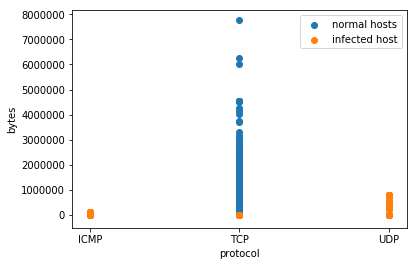

In [103]:
# plotting any two features 

f1 = 'protocol'
f2 = 'bytes'
plt.scatter(normal[f1], normal[f2], label='normal hosts')
plt.scatter(infected[f1], infected[f2], label='infected host')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()
plt.show()

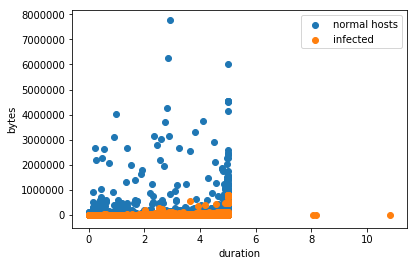

In [104]:
#plotting any two features 

f1 = 'duration'
f2 = 'bytes'
plt.scatter(normal[f1], normal[f2], label='normal hosts')
plt.scatter(infected[f1], infected[f2], label='infected')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()
plt.show()

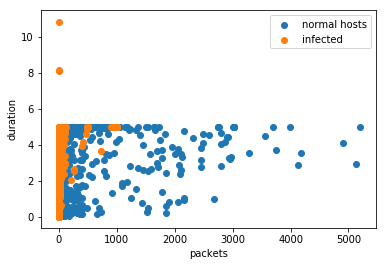

In [105]:
#plotting any two features


f1 = 'packets'
f2 = 'duration'
plt.scatter(normal[f1], normal[f2], label='normal hosts')
plt.scatter(infected[f1], infected[f2], label='infected')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()
plt.show()

In [137]:
#standard discreatization method followed as mentioned in class 
class Mapping:
    size = None
    def value(self, index):
        return self.mapped[index]


class Numerical_comp(Mapping):
    def __init__(self, df, feature, num_bins=10):
        self.size = num_bins
        thresholds = np.percentile(
            df[feature], np.arange(0.1, 1.0, 1.0 / self.size)
        )
        def get_code(value):
            for code, threshold in enumerate(thresholds):
                if value < threshold:
                    return code
            else:
                return 0
        self.mapped = dict(
            (i, get_code(row[feature]))
            for i, row in df.iterrows()
        )


class Categorical(Mapping):
    def __init__(self, df, feature):
        codes = dict(
            (value, code) for (code, value) in
            enumerate(sorted(df[feature]))
        )
        self.mapped = dict(
            (i, codes[row[feature]])
            for i, row in df.iterrows()
        )
        self.size = len(codes)


def encode(df, features):    
    mappings = [mapper(df, feature) for mapper, feature in features]
    
    encoded = []
    for index, _ in df.iterrows():
        space_size = 1
        for mapping in mappings:
            space_size *= mapping.size
        
        code = 0
        for mapping in mappings:
            space_size /= mapping.size
            code += mapping.value(index) * space_size
            
        encoded.append(code)
    return encoded

In [138]:
# get the discrete features for normal and infested hosts 
features = [(Categorical, 'protocol'), (Numerical_comp, 'bytes')]

normal_select = normal.loc[normal['src_addrIP'] == normal_hosts[0]]

normal_enc = encode(normal_select, features)
infected_enc = encode(infected, features)

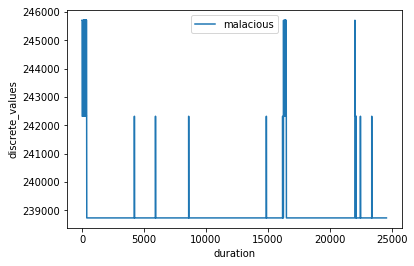

In [139]:
#plot them 
# see the behaviour of malacious '


plt.plot(infected_enc, label='malacious')
plt.xlabel('duration')
plt.ylabel('discrete_values')
plt.legend()
plt.show()

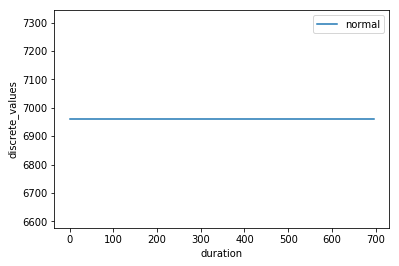

In [140]:
# see the behaviour of normal hosts 


plt.plot(normal_enc, label='normal')

plt.xlabel('duration')
plt.ylabel('discrete_values')
plt.legend()
plt.show()